In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Implementation

In [68]:
class LinearRegression:
        def __init__(self, alpha=0.01, minimum_error_decrease=0.000001):
            self.weights = None
            self.intercept = None
            self.num_rows = None
            self.learning_rate = alpha
            self.minimum_error_decrease = minimum_error_decrease
            
        # cost / error function
        # sum of squared residuals, divided by twice the number of data points
        def cost(self, X, y):
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)
            
            residuals = np.dot(X2, self.weights) - y
            value = 1 / (2 * len(X2)) * np.dot(residuals.T, residuals)
            return value[0][0]
        
        def fit(self, X, y):
            # append a column of ones to the X matrix, for the y-intercept term
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)
            y = np.asarray(y)
            
            
            # initialize weights as 0
            self.weights = np.asarray([[0] for i in range(len(X2[0]))])
            
            m = len(X)            
            costs = []
            
            while True:
                
                residuals = np.dot(X2, self.weights) - y
 
                # compute cost function
                curr_cost = (1 / (2 * m) * np.dot(residuals.T, residuals))[0][0]
                costs.append(curr_cost)
                previous = curr_cost
                
                # gradient descent 
                self.weights = self.weights - (self.learning_rate / m) * np.dot(X2.T, residuals)
            
                # compute error of next iteration
                curr_cost = self.cost(X, y)
                diff = curr_cost - previous

                # if the cost function decreases by less than a certain amount, terminate
                if diff >= -self.minimum_error_decrease:
                    break
                    
        def predict(self, X):
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)
            
            return np.dot(X2, self.weights).flatten()


## Testing

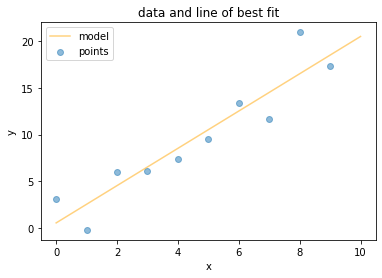

In [80]:
X = []
y = []
for i in range(10):
    X.append([i])
    y.append([2*i + 2 * np.random.normal()])


linreg = LinearRegression()
linreg.fit(X, y)
score = linreg.cost(X, y)

x_space = np.linspace(0, 10)
predictions = linreg.predict(X)

plt.scatter(np.asarray(X).flatten(), np.asarray(y).flatten(), label='points', alpha=0.5)

values = [linreg.predict([[x]])[0] for x in x_space]
plt.plot(x_space, values, label='model', color='orange', alpha=0.5)
plt.title('data and line of best fit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()